# Student CGPA prediction using grades

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

import the required packages

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.shape

(571, 43)

In [5]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [6]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

# EDA

In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [8]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [9]:
df.head(1)

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205


In [10]:
df.tail(1)

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [11]:
# drop seat no.
df.drop(['Seat No.'],axis=1,inplace=True)

In [12]:
df.head(1)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205


In [13]:
missdata=df.isnull().sum()

In [14]:
miss_data = df.isnull().sum().mode().iloc[0]
df.fillna(miss_data, inplace=True)

In [14]:
df.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [15]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [16]:
df.nunique()

PH-121     13
HS-101     12
CY-105     14
HS-105     14
MT-111     14
CS-105     11
CS-106     14
EL-102     14
EE-119     13
ME-107     14
CS-107     15
HS-205     14
MT-222     15
EE-222     14
MT-224     15
CS-210     15
CS-211     15
CS-203     14
CS-214     14
EE-217     14
CS-212     13
CS-215     15
MT-331     13
EF-303     13
HS-304     15
CS-301     13
CS-302     12
TC-383     13
MT-442     13
EL-332     14
CS-318     15
CS-306     14
CS-312     15
CS-317     13
CS-403     12
CS-421     14
CS-406     15
CS-414     14
CS-419     13
CS-423     13
CS-412     14
CGPA      491
dtype: int64

In [17]:
for col in df.columns:
    uni = df[col].unique()
    print(f"{col}: {len(uni)}")
    print(uni)
    print()

PH-121: 13
['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']

HS-101: 12
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']

CY-105: 14
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 10 'WU' 'A+' 'F']

HS-105: 14
['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 10 'WU' 'A+' 'F']

MT-111: 14
['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 10 'A+' 'F' 'WU']

CS-105: 11
['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']

CS-106: 14
['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 10 'A+' 'F' 'WU']

EL-102: 14
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 10 'A+' 'WU' 'F']

EE-119: 13
['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' 10 'A+']

ME-107: 14
['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' 10 'F' 'A+']

CS-107: 15
['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' 10 'A+' 'I' 'WU' 'F']

HS-205: 14
['B+' 'C+' 'A-' 'B' 'A' 'B-' 10 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F']

MT-222: 15
['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' 10 'C-' 'WU' 'F' 'A+' 'W']

EE-222: 14
['A-' '

In [18]:
for col in df.columns:
    unique_objects_count = df[col].value_counts()
    print(f"{len(df[col].unique())}")
    print(unique_objects_count)
    print()

13
PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64

12
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64

14
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
10      1
F       1
Name: count, dtype: int64

14
HS-105
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
10     1
F      1
Name: count, dtype: int64

14
MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
10      2
F       2
Name: count, dtype: int64

11
CS-105
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: count, dtype: int64

14
CS-106
A-    116
B+  

In [19]:
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [20]:
for col in df.columns:
    unique_objects_count = df[col].value_counts()
    print(f"{len(df[col].unique())}")
    print(unique_objects_count)
    print()

12
PH-121
A-    112
A     110
B+     58
B      56
B-     53
D      37
C      31
C+     30
D+     22
A+     22
C-     15
F       1
Name: count, dtype: int64

12
HS-101
A-    80
B-    75
C     67
B     62
B+    58
C-    48
C+    45
D     40
A     38
D+    29
A+     4
F      1
Name: count, dtype: int64

11
CY-105
A     174
A-    117
B+     49
B      46
B-     39
A+     31
D      27
C      19
C-     16
C+     15
D+     14
Name: count, dtype: int64

11
HS-105
A     95
A-    71
B+    69
B     56
D     41
B-    39
C     37
C-    36
C+    36
A+    34
D+    33
Name: count, dtype: int64

13
MT-111
A-    104
A      99
B-     67
B+     61
B      52
C-     36
C+     33
C      28
D      23
A+     23
D+     19
F       1
10      1
Name: count, dtype: int64

11
CS-105
A     148
A-    133
B+     59
B      47
A+     42
B-     35
C+     22
C      20
C-     20
D+     14
D       7
Name: count, dtype: int64

11
CS-106
A-    113
B+    100
B      93
A      56
B-     49
C+     40
D+     28
C-     27
D      23
C

In [21]:
group= {'A+': 'A', 'A-': 'A',  'B+': 'B', 'B-': 'B',  'C+': 'C','C-': 'C', 'D-':'D','D+':'D'}

for col in df.columns:
    df[col] = df[col].replace(group)

for col in df.columns:
    print(f"Column {col}:{len(df[col].unique())}")
    print(df[col].value_counts())
    print()

Column PH-121:5
PH-121
A    244
B    167
C     76
D     59
F      1
Name: count, dtype: int64

Column HS-101:5
HS-101
B    195
C    160
A    122
D     69
F      1
Name: count, dtype: int64

Column CY-105:4
CY-105
A    322
B    134
C     50
D     41
Name: count, dtype: int64

Column HS-105:4
HS-105
A    200
B    164
C    109
D     74
Name: count, dtype: int64

Column MT-111:6
MT-111
A     226
B     180
C      97
D      42
F       1
10      1
Name: count, dtype: int64

Column CS-105:4
CS-105
A    323
B    141
C     62
D     21
Name: count, dtype: int64

Column CS-106:4
CS-106
B    242
A    173
C     81
D     51
Name: count, dtype: int64

Column EL-102:5
EL-102
A     223
B     172
C      94
D      57
10      1
Name: count, dtype: int64

Column EE-119:5
EE-119
A     205
B     203
C     105
D      32
10      2
Name: count, dtype: int64

Column ME-107:5
ME-107
B     169
A     163
C     127
D      87
10      1
Name: count, dtype: int64

Column CS-107:5
CS-107
A     225
B     154
C     109
D  

In [22]:
df.head(3)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B,D,C,C,C,D,D,C,B,C,...,C,C,C,C,A,A,C,B,A,2.205
1,A,D,D,D,B,C,D,A,D,D,...,D,D,C,D,A,B,C,C,B,2.008
2,A,B,A,B,B,A,B,B,A,A,...,B,B,A,C,A,A,A,A,A,3.608


In [23]:
for column in df.columns:
    
    df[column]=df[column].replace(10, 5.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

In [24]:
df.head(2)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,...,2.0,2.0,2.0,2.0,4.0,4.0,2.0,3.0,4.0,2.205
1,4.0,1.0,1.0,1.0,3.0,2.0,1.0,4.0,1.0,1.0,...,1.0,1.0,2.0,1.0,4.0,3.0,2.0,2.0,3.0,2.008


In [25]:
df.describe()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.085923,2.672761,3.347349,2.895795,3.080439,3.400366,2.981718,3.031079,3.073126,2.751371,...,2.959781,2.747715,3.155393,2.550274,3.594150,3.535649,3.080439,3.029250,3.530165,2.995388
std,1.013609,0.964977,0.927800,1.047464,0.957390,0.835696,0.915693,1.002261,0.900829,1.055412,...,1.093701,0.928965,0.945194,0.933079,0.975807,0.743784,0.819252,0.962228,0.935906,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.500000,2.000000,...,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.587500
50%,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.058000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.474000
max,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.985000


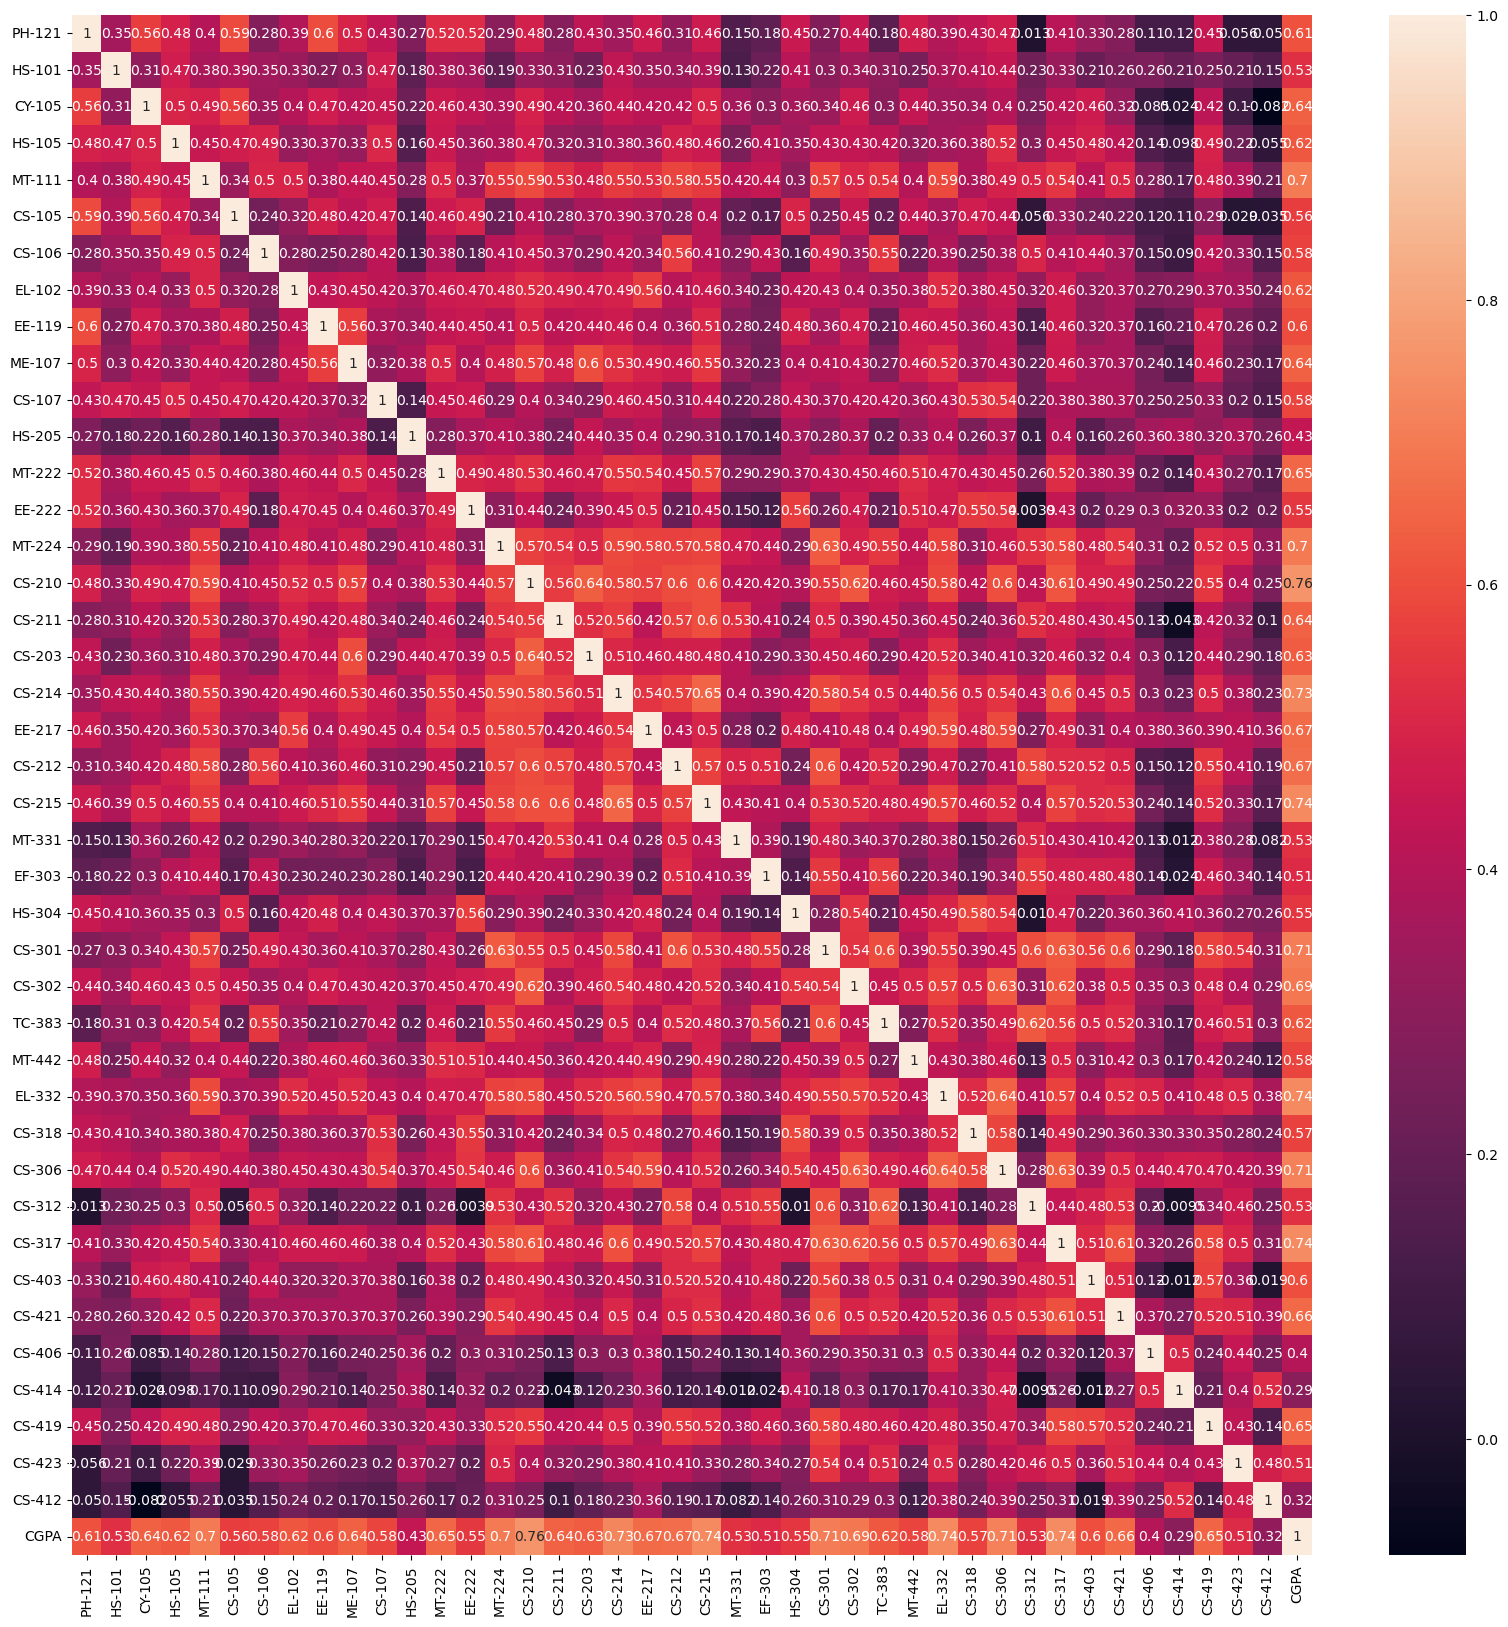

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

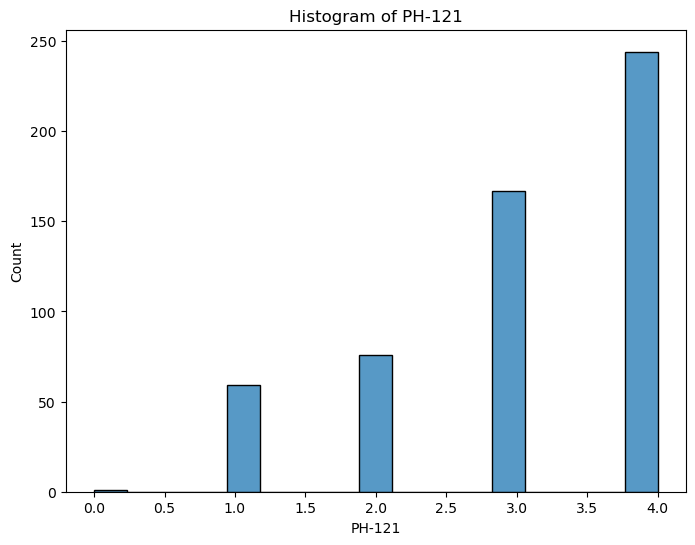

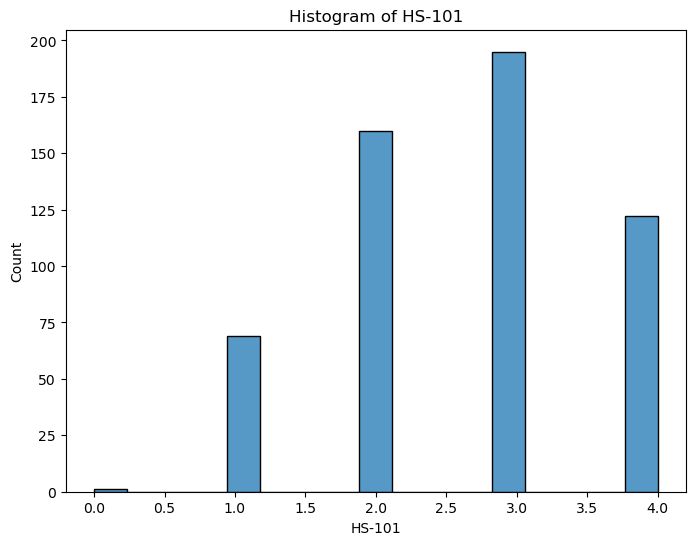

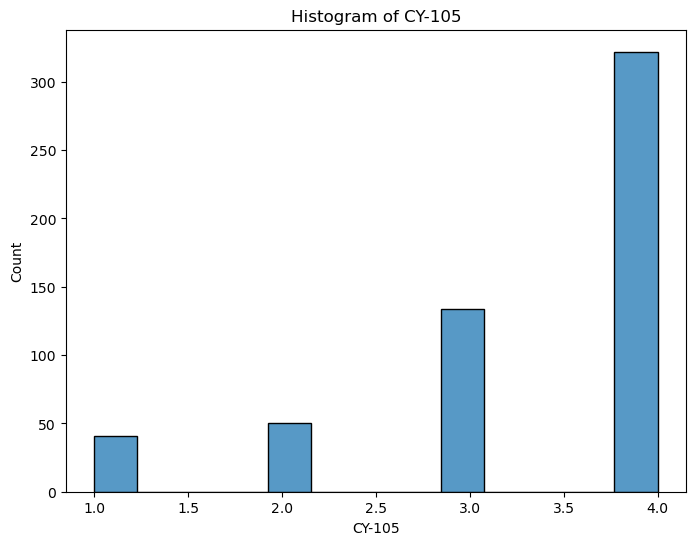

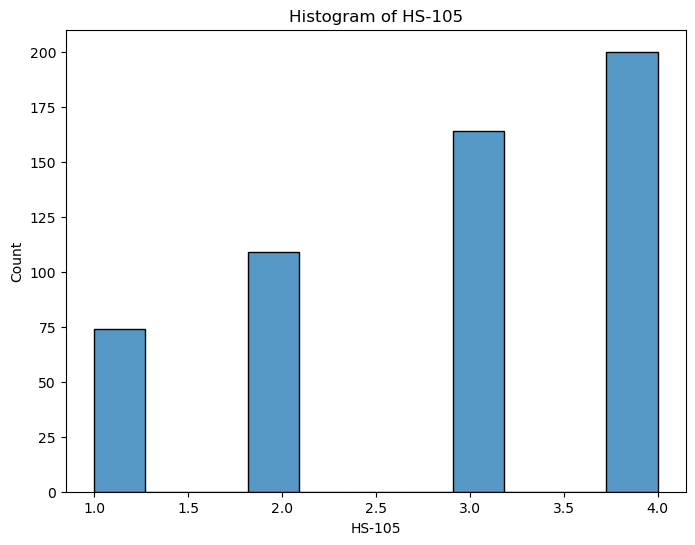

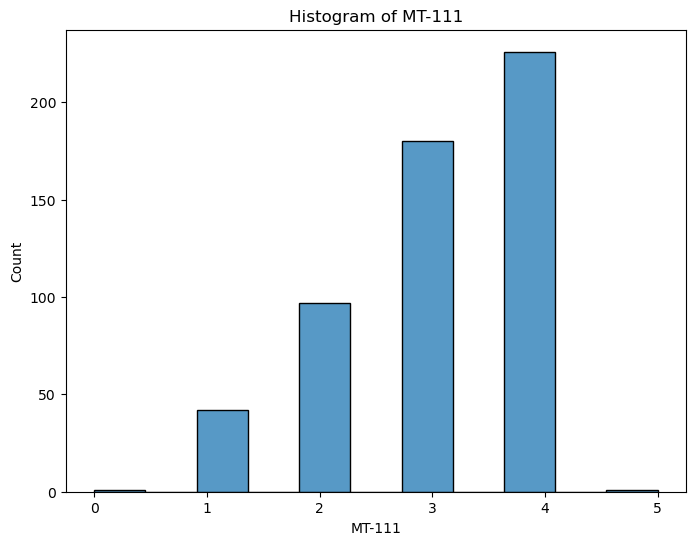

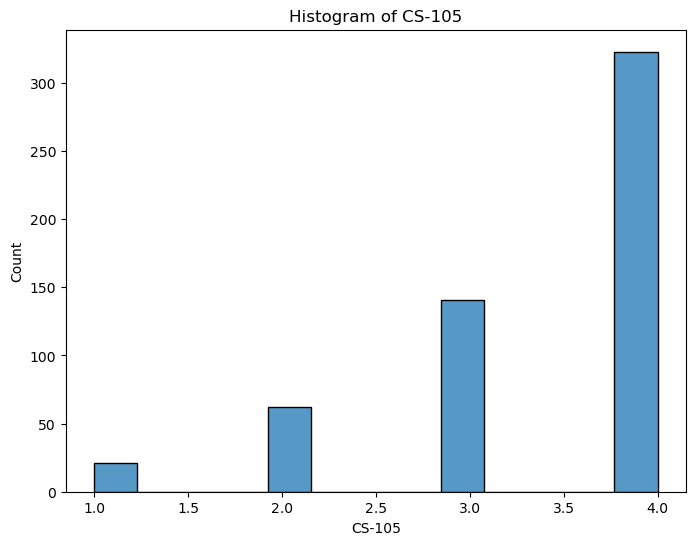

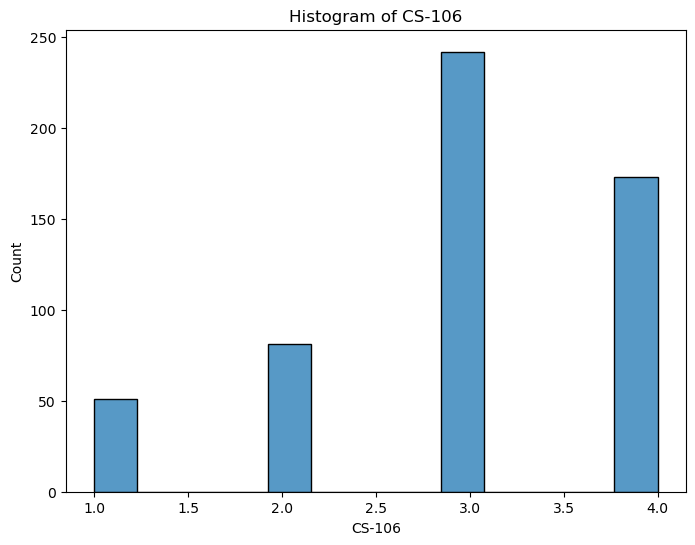

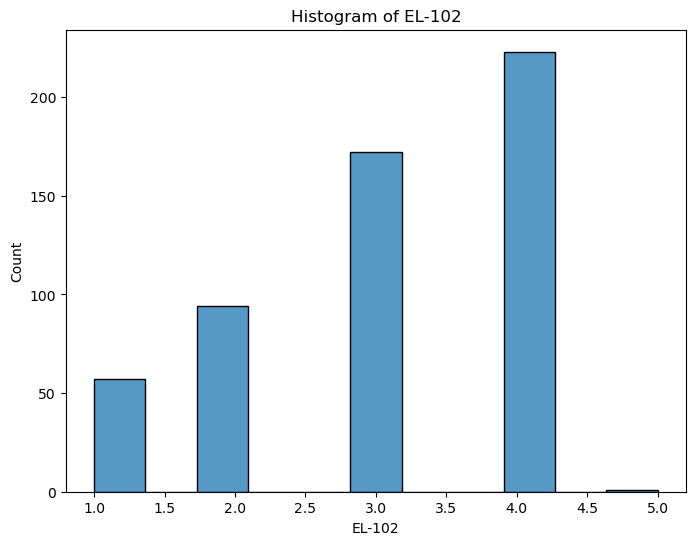

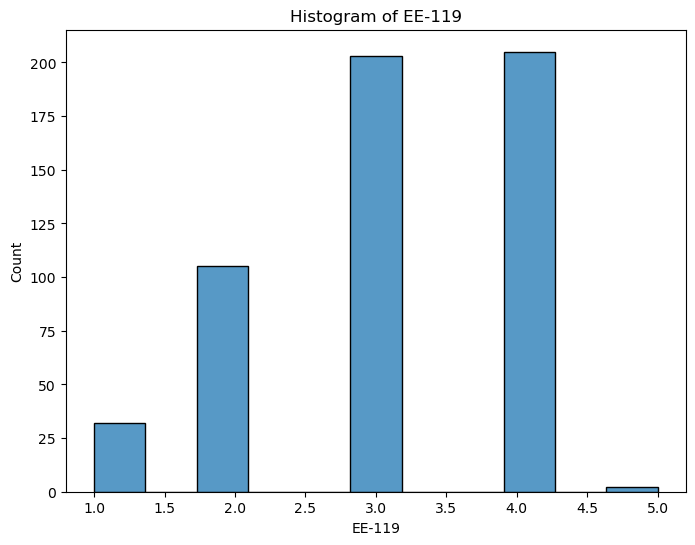

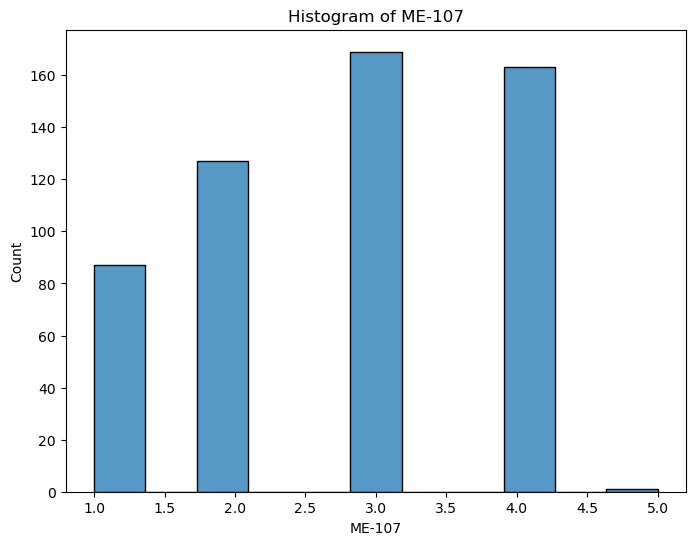

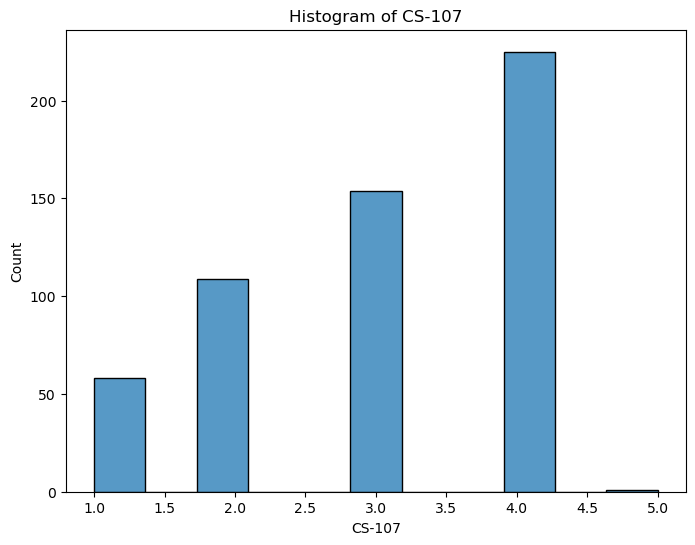

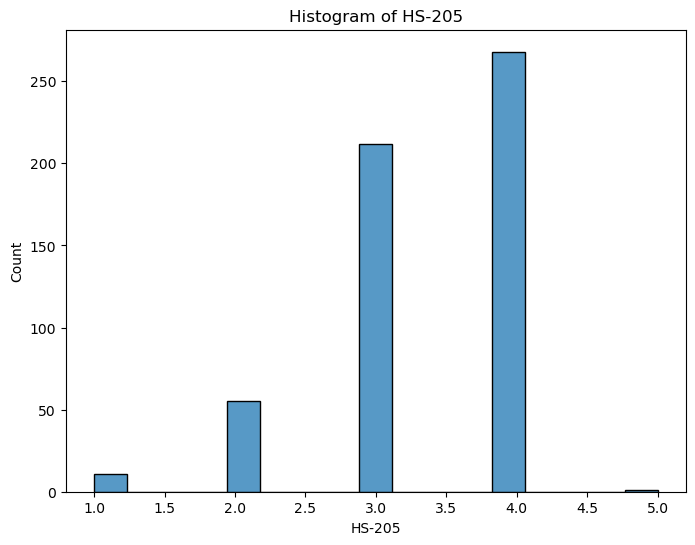

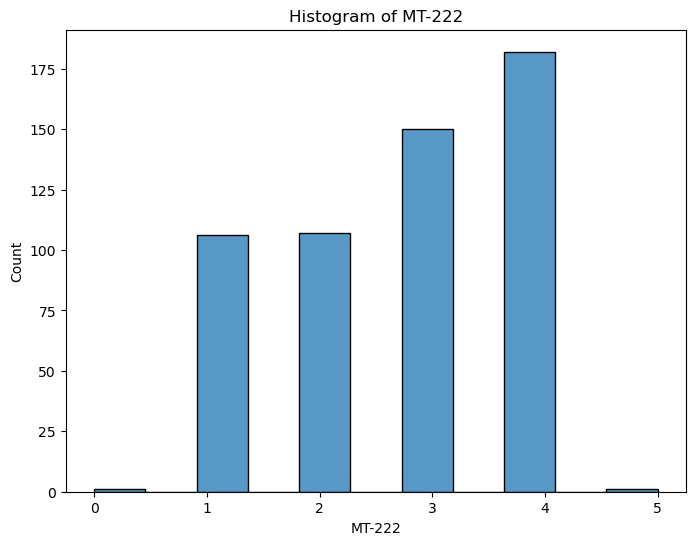

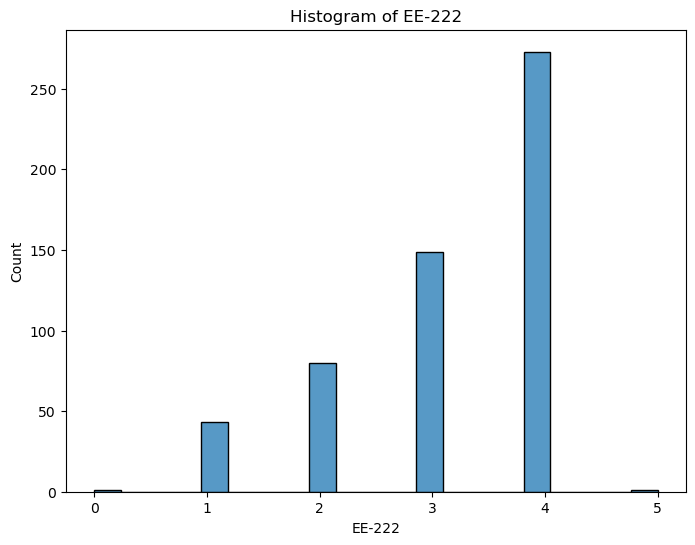

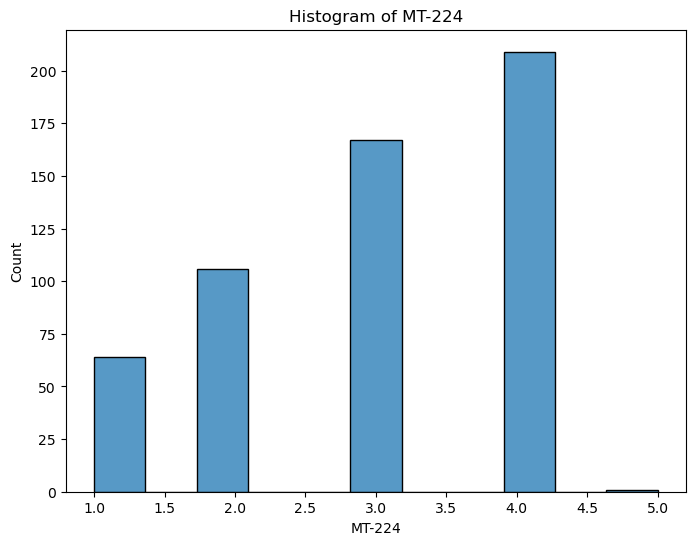

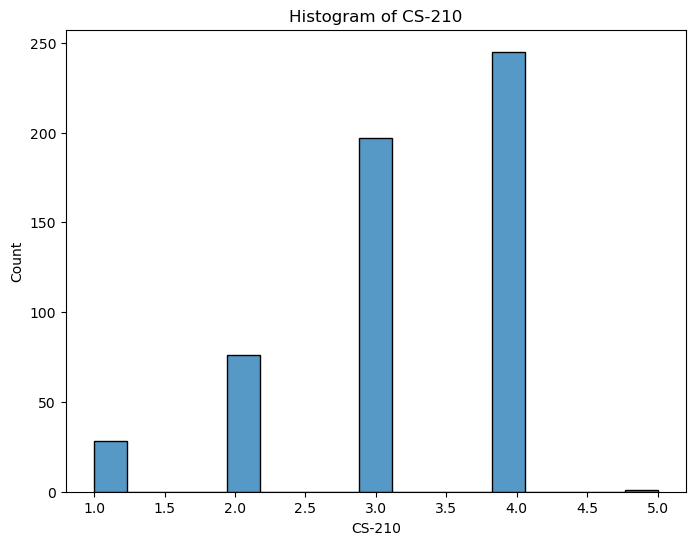

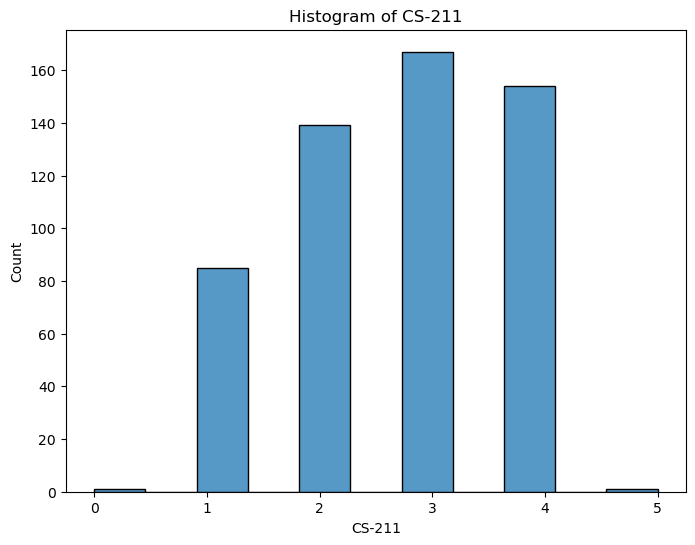

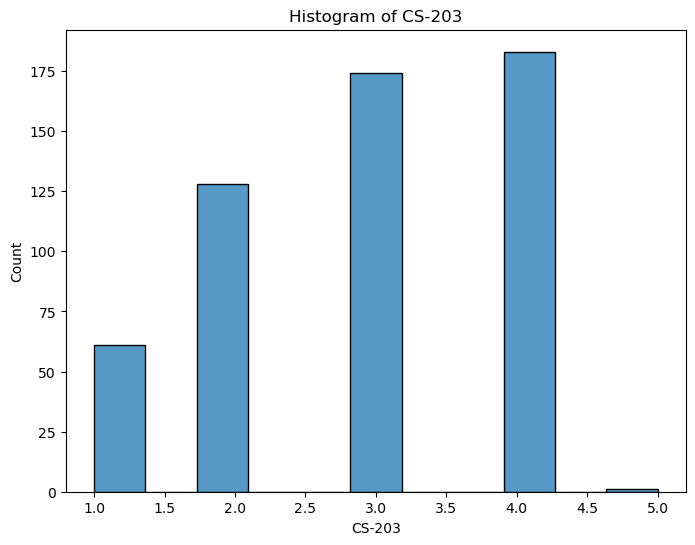

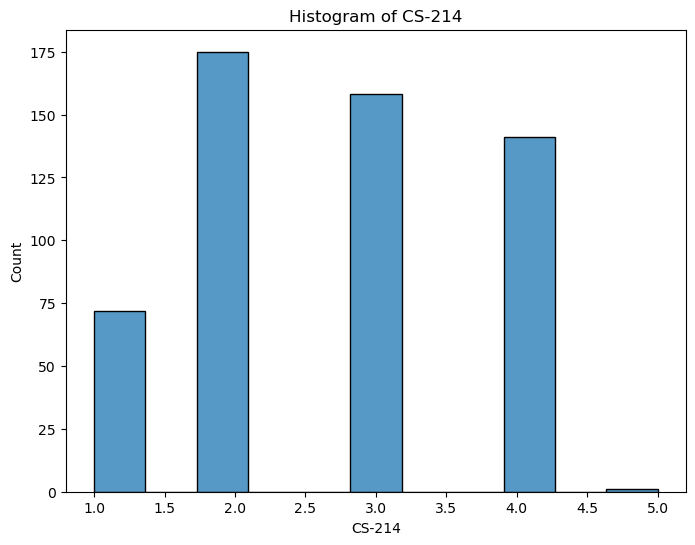

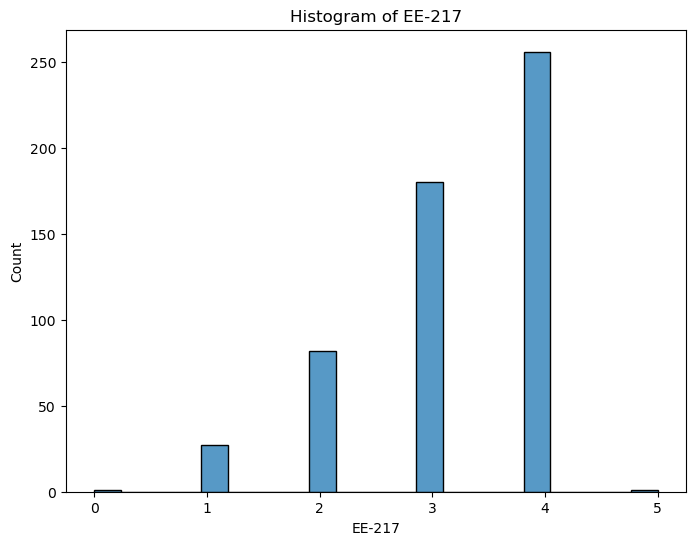

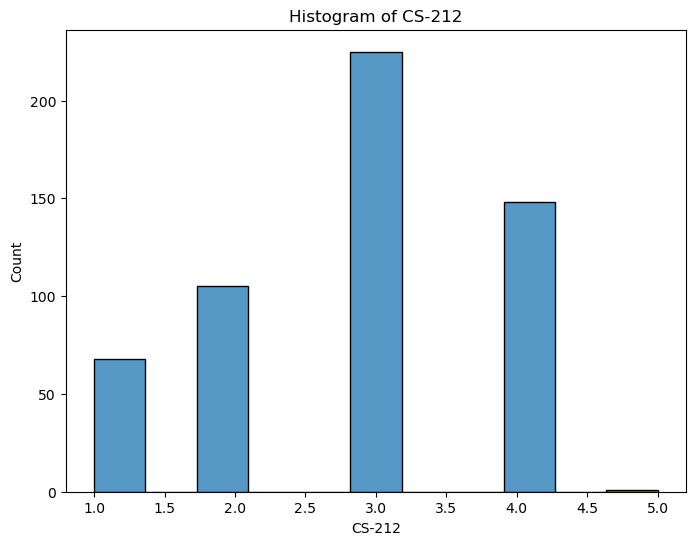

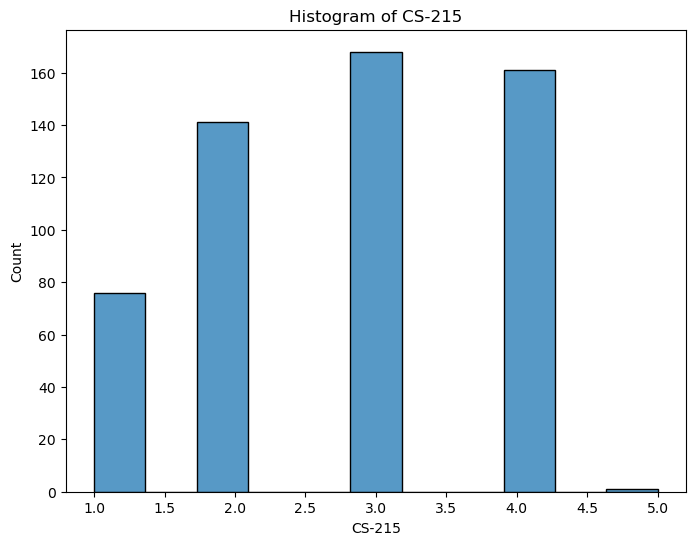

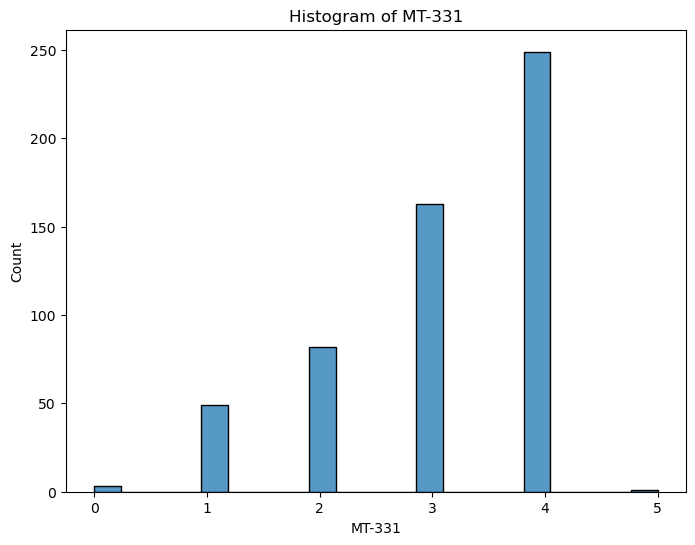

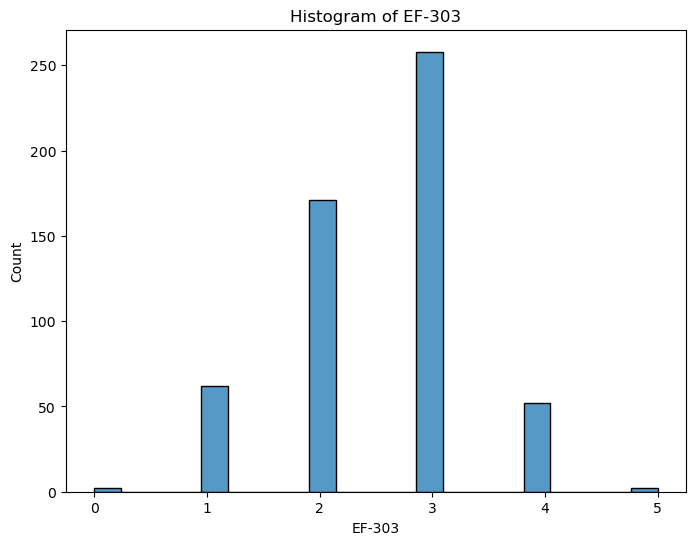

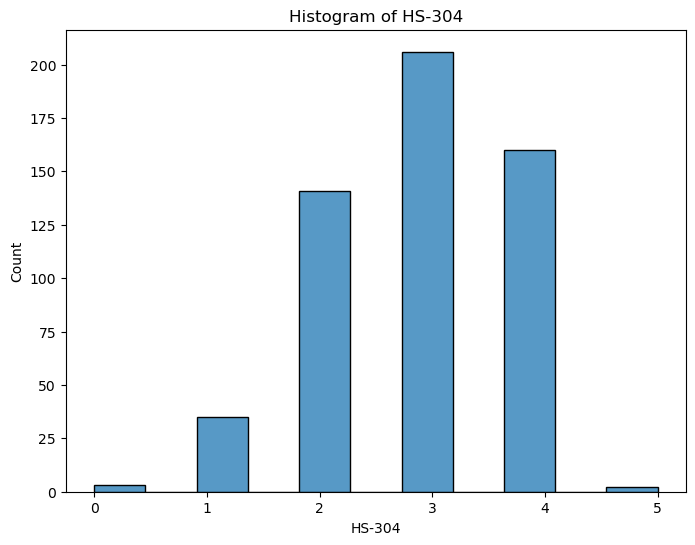

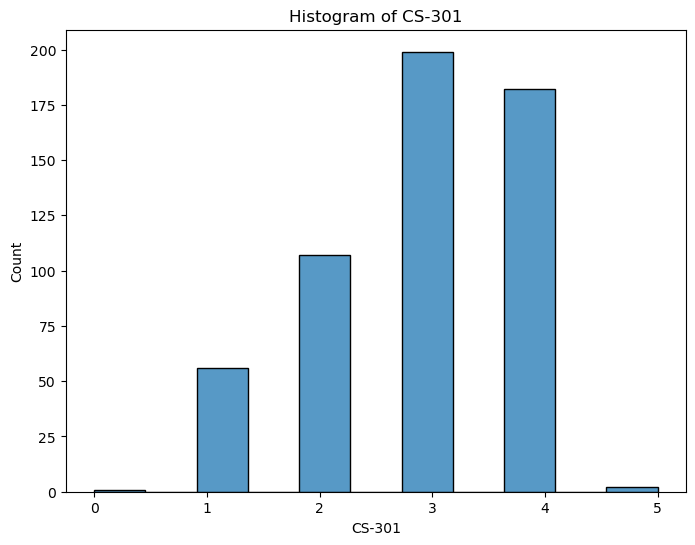

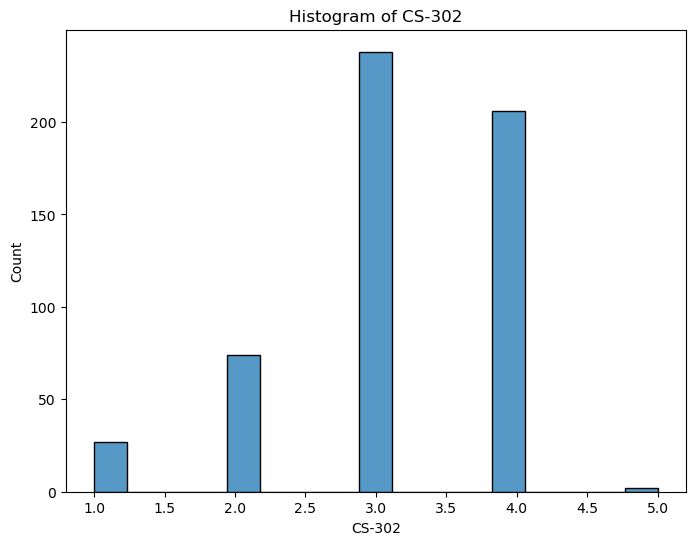

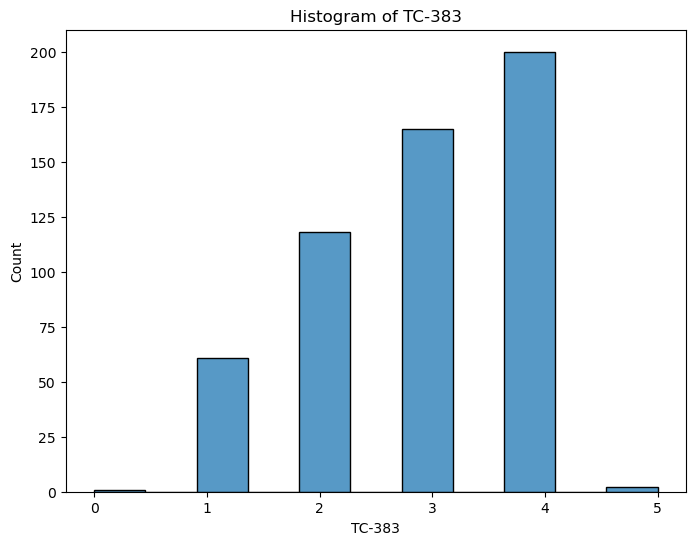

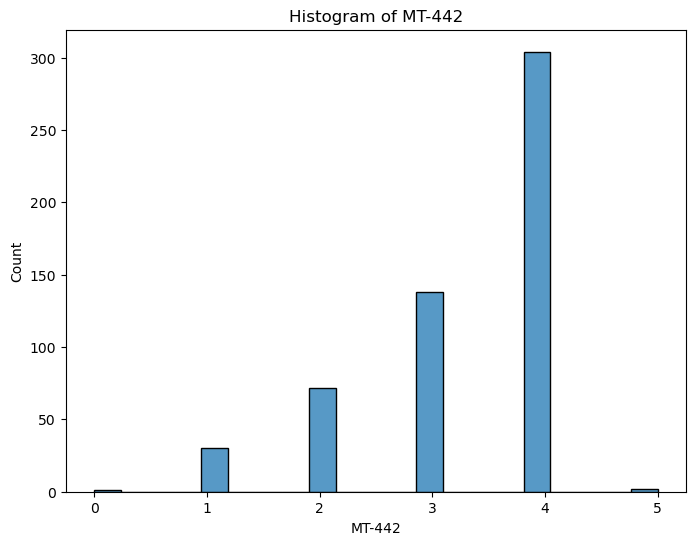

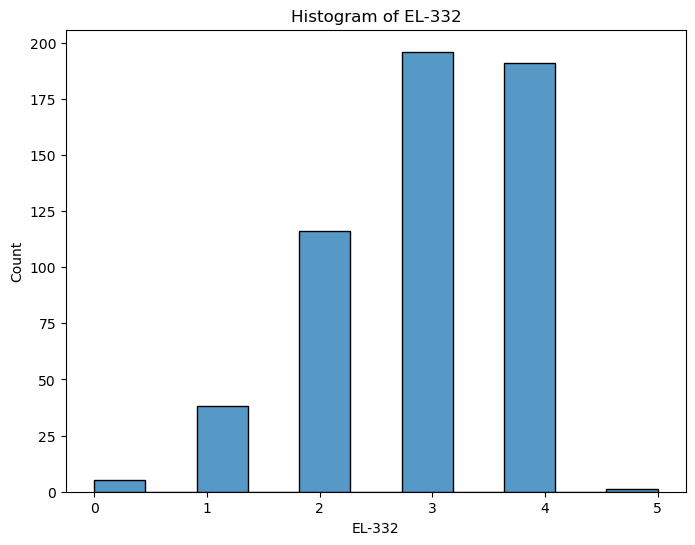

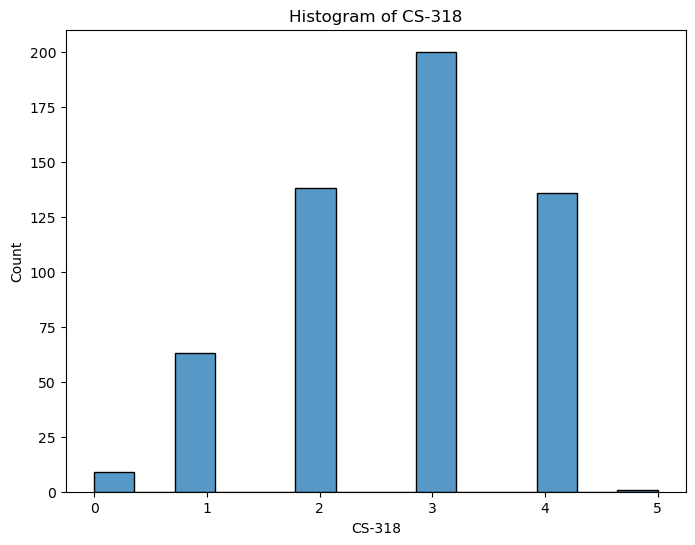

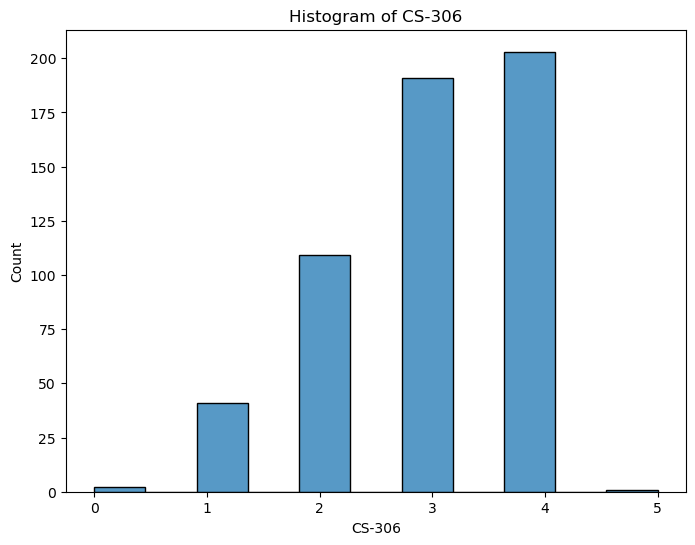

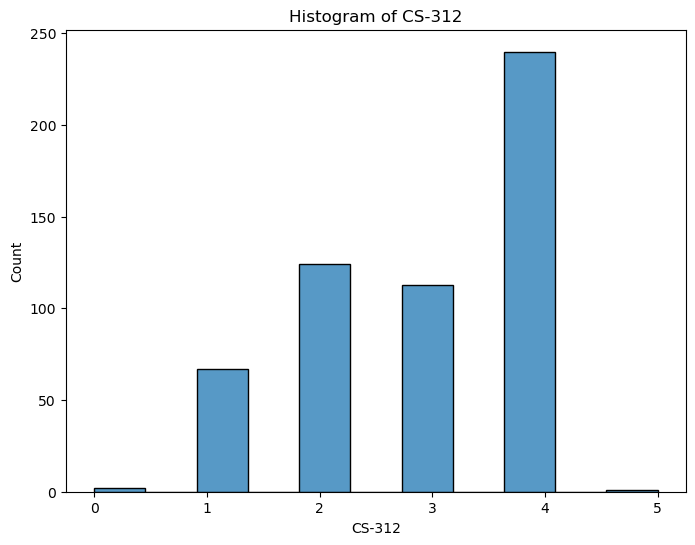

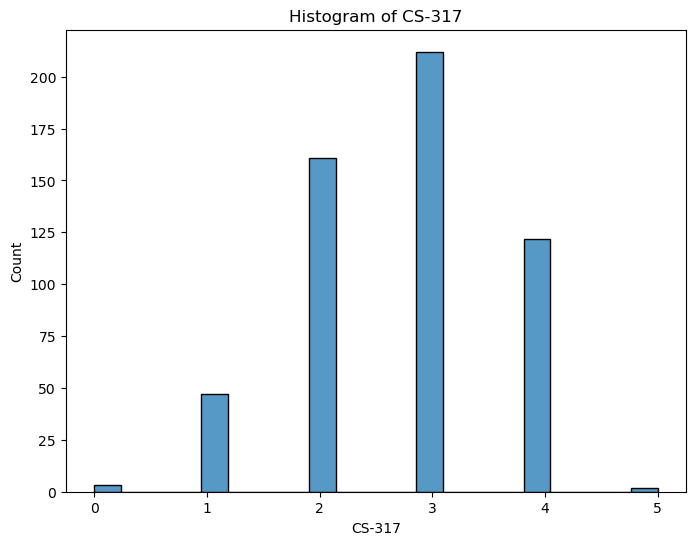

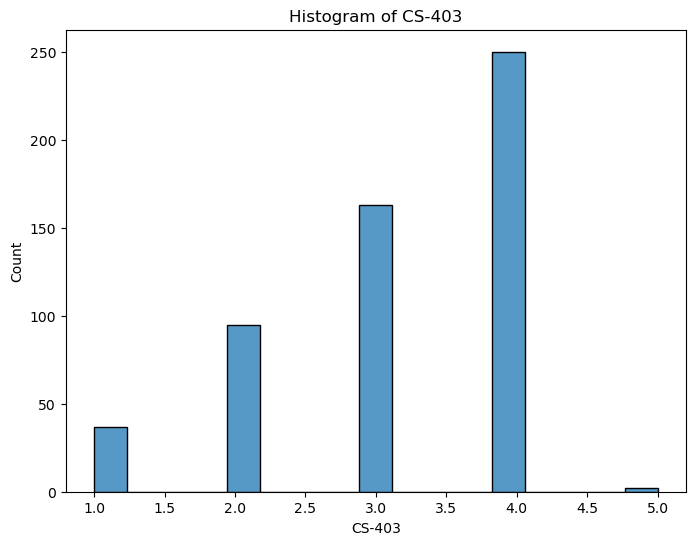

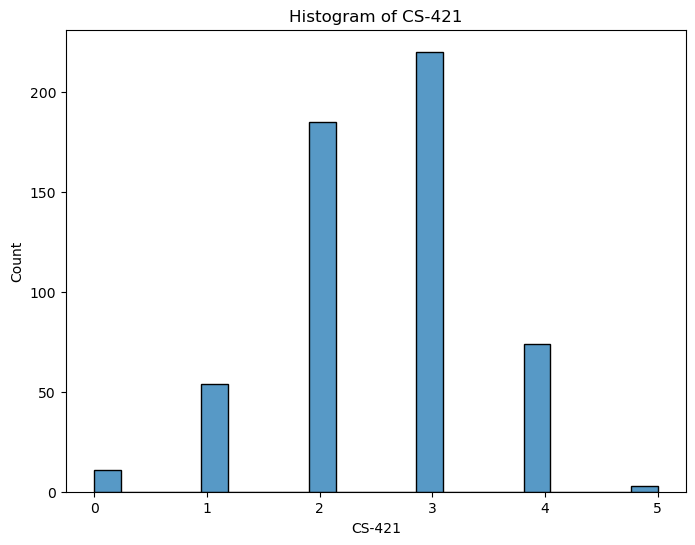

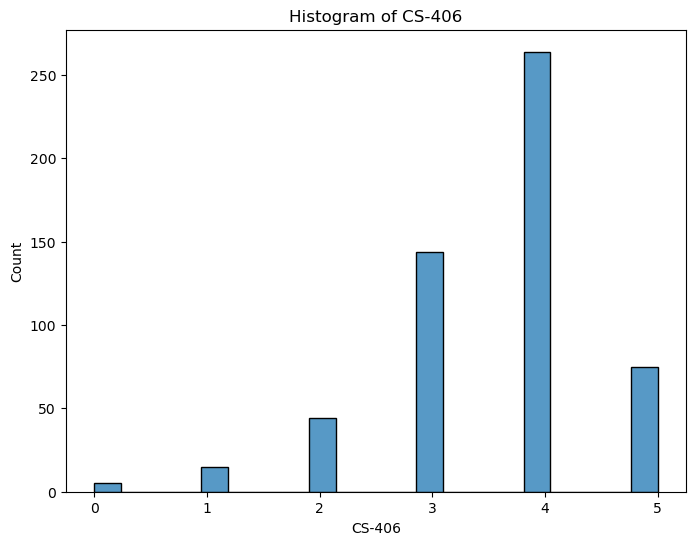

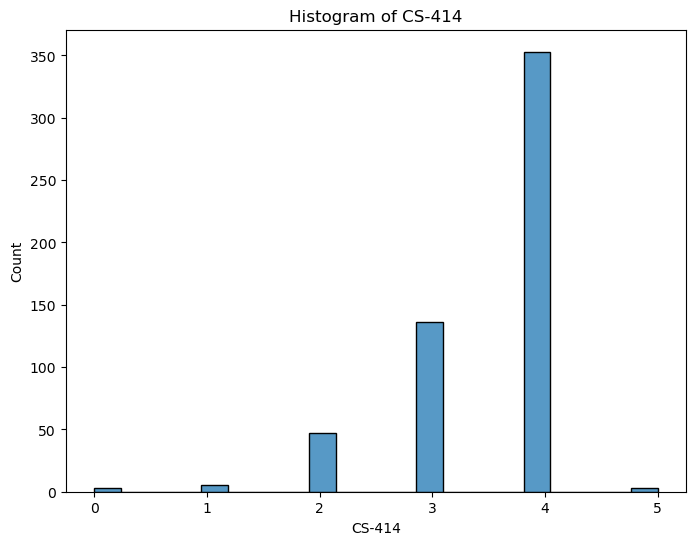

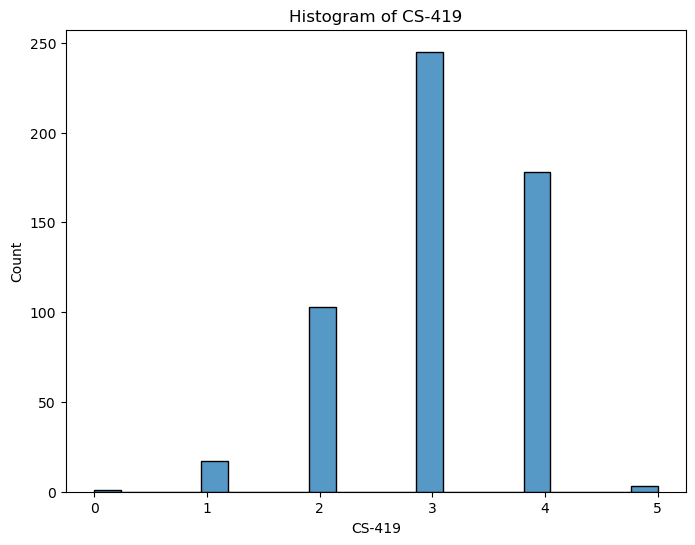

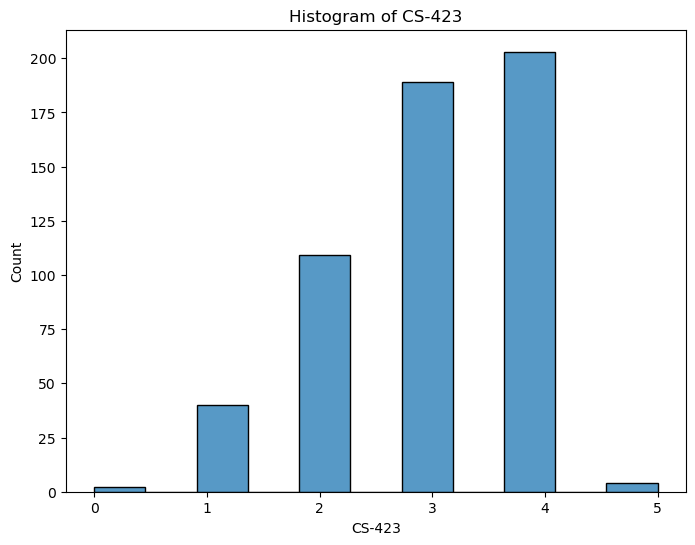

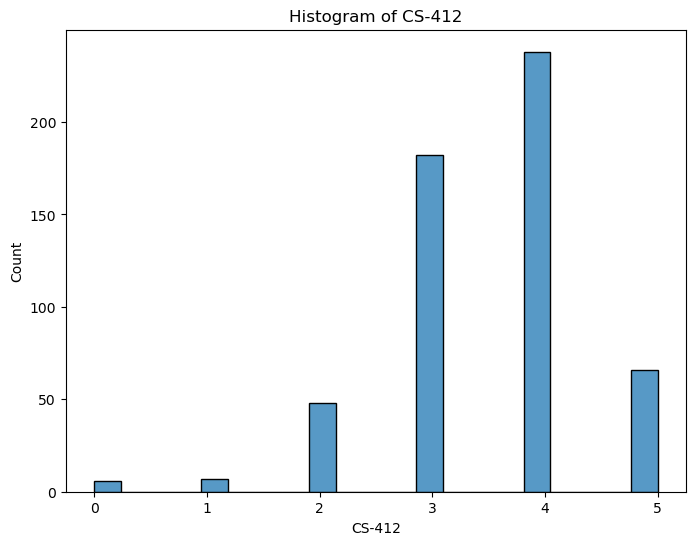

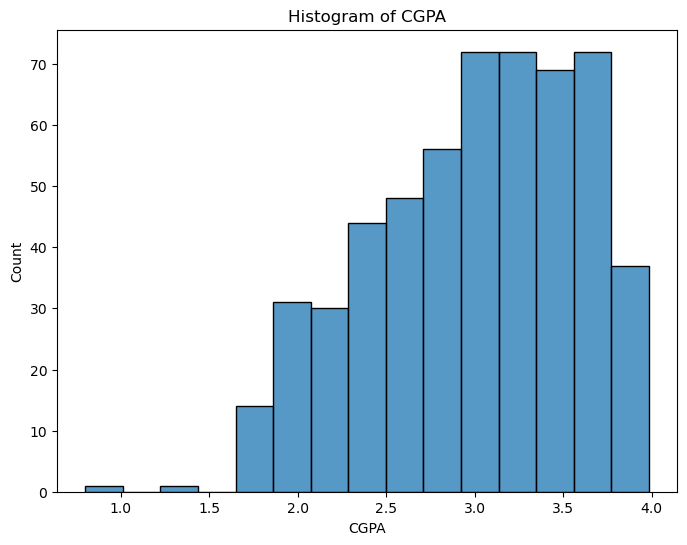

In [27]:
for column in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()

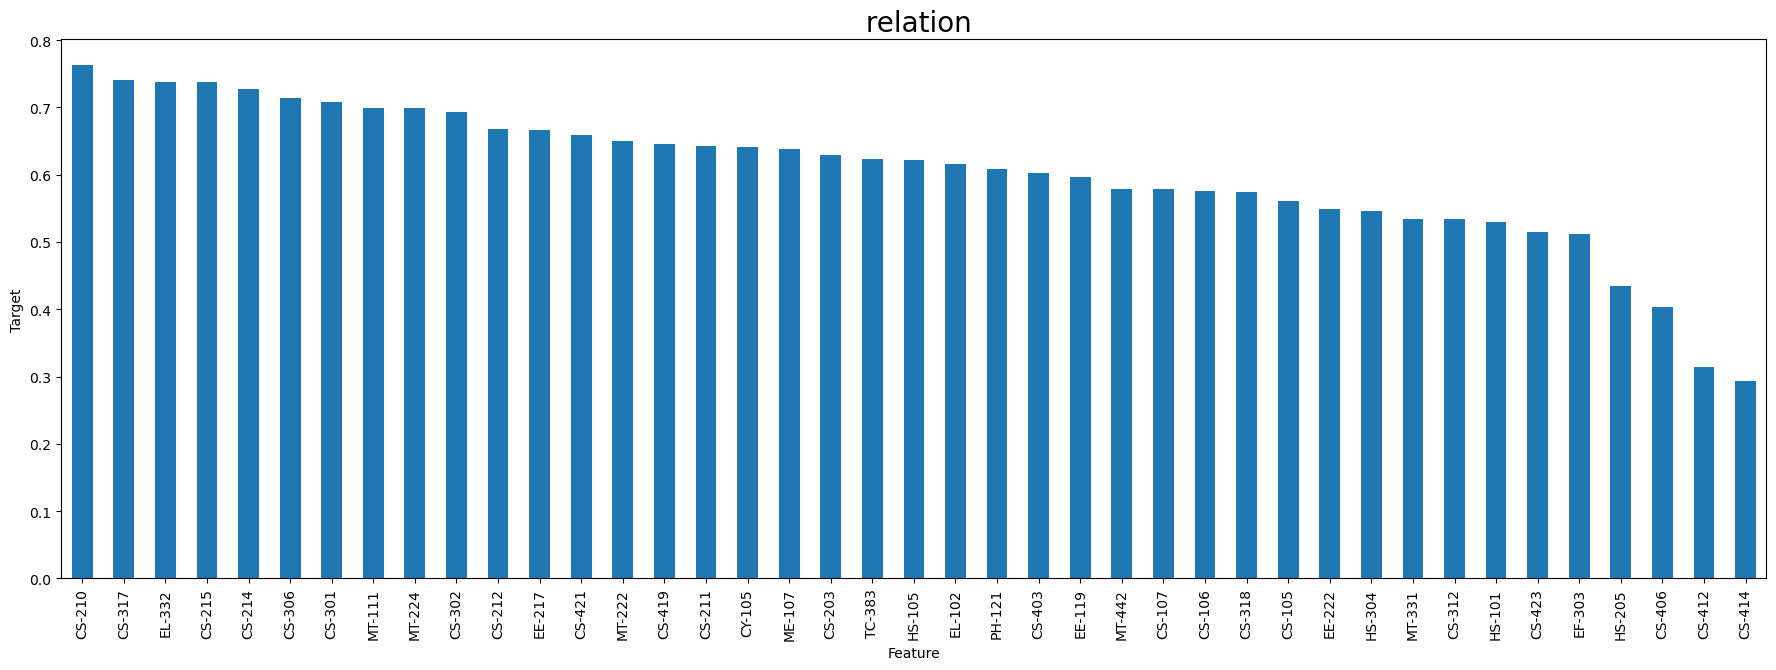

In [28]:
plt.figure(figsize=(22,7))
df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

# Machine learning

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [32]:

X=df.drop('CGPA',axis=1)
y=df['CGPA']

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif["Feature"]=X.columns
vif

,VIF val,Feature
0,29.373554,PH-121
1,15.725261,HS-101
2,34.011847,CY-105
3,20.987868,HS-105
4,28.056061,MT-111
5,37.958876,CS-105
6,22.717019,CS-106
7,20.706322,EL-102
8,29.132806,EE-119
9,18.002199,ME-107


In [34]:
X.drop(['CS-414', 'CS-210'], axis=1, inplace=True)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif["Feature"]=X.columns
vif

,VIF val,Feature
0,29.153640,PH-121
1,15.695341,HS-101
2,33.917144,CY-105
3,20.876926,HS-105
4,27.934281,MT-111
5,37.717452,CS-105
6,22.526567,CS-106
7,20.286376,EL-102
8,28.977635,EE-119
9,17.722683,ME-107


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor()}


In [38]:
y_preds = {}
for key, value in model.items():
    value.fit(X_train, y_train)
    y_pred = value.predict(X_test)
    y_preds[key] = y_pred
y_pred

array([3.71473219, 3.68832111, 3.76028364, 3.7816505 , 3.5683791 ,
       2.79219739, 2.53959291, 2.62952827, 3.73352831, 2.24826297,
       2.89558708, 3.76133739, 3.22874077, 2.43330715, 2.49323015,
       3.69294378, 2.68580171, 3.22451379, 2.62107807, 1.91586329,
       3.11378973, 2.19719338, 2.63515111, 2.70770311, 3.37498018,
       3.42856848, 2.75614705, 2.6058221 , 2.77555853, 3.25580712,
       3.40615668, 2.7749154 , 2.11229826, 3.21128718, 2.77988663,
       3.06680928, 1.90176469, 3.5203834 , 3.17339748, 3.90483823,
       2.80790049, 2.61261971, 3.36156368, 2.9939093 , 2.39557487,
       3.00347131, 2.1102178 , 2.01020689, 3.82301326, 3.81091073,
       3.44409503, 3.90049809, 2.27775143, 3.05726587, 2.09539642,
       2.48013804, 3.33796479, 3.18830807, 2.78849456, 3.14784206,
       2.38989493, 3.05039117, 2.82326887, 3.70369554, 3.83133447,
       2.06949024, 2.58337145, 2.17929259, 3.50923762, 2.84267525,
       2.37448475, 2.5803958 , 2.23400411, 3.07618798, 3.82502

In [39]:
value.score(X_train,y_train)

0.9952319684223921

In [40]:
value.score(X_test,y_test)

0.9450251502946416

In [41]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(X_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)


Details for each model:
          MAE       MSE      RMSE        R2
dt   0.188705  0.063900  0.252784  0.814908
rf   0.089369  0.018183  0.134846  0.947330
lR   0.090026  0.017396  0.131892  0.949612
svr  0.071519  0.019154  0.138397  0.944519
knn  0.119256  0.027771  0.166647  0.919558
rid  0.089748  0.017321  0.131609  0.949828
ls   0.490785  0.345686  0.587950 -0.001311
gb   0.083870  0.018979  0.137765  0.945025


In [42]:
best_model = details['MSE'].idxmin()

print(f"The best model based on MSE is: {best_model}")

The best model based on MSE is: rid


In [43]:
final_model = Ridge()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [44]:
prediction=final_model.predict(X_test) 
prediction

array([3.76117832, 3.69779071, 3.78865402, 3.73584081, 3.56387632,
       3.16975967, 2.39162369, 2.61934568, 3.70866428, 2.45394653,
       2.90269605, 3.71071102, 3.17001653, 2.34015285, 2.42478178,
       3.60182038, 2.85884354, 3.34551109, 2.50381356, 2.06089897,
       3.27633511, 2.16853426, 2.53844003, 2.81101412, 3.27937726,
       3.54065806, 2.5892493 , 2.63016249, 2.73836073, 3.25209051,
       3.47151127, 2.7424061 , 2.06728641, 3.17347996, 2.6743396 ,
       3.1526835 , 1.87111257, 3.47735182, 3.27885552, 3.94140384,
       2.8724859 , 2.86573036, 3.22801225, 2.9734597 , 2.61074017,
       3.10162702, 1.97649201, 1.90049275, 3.68320486, 3.74919897,
       3.56497932, 3.87331483, 2.42056068, 2.91253179, 2.20600379,
       2.37306507, 3.17235499, 3.18488486, 2.86074658, 3.23455413,
       2.66145473, 2.87964793, 2.97906173, 3.78781349, 3.83713376,
       1.74414238, 2.6111011 , 1.99905691, 3.49568658, 2.67344594,
       2.41397842, 2.78627678, 2.27275519, 3.11299783, 3.82171

In [45]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,3.761178,3.736
1,3.697791,3.647
2,3.788654,3.707
3,3.735841,3.861
4,3.563876,3.621
...,...,...
105,2.838879,2.880
106,3.585430,3.700
107,2.815851,3.010
108,3.494899,3.500
